In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('/content/user_behavior_dataset.csv')

In [26]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [27]:
df.drop('Device Model', axis=1, inplace=True)

In [28]:
df.head()

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Android,393,6.4,1872,67,1122,40,Male,4
1,2,Android,268,4.7,1331,42,944,47,Female,3
2,3,Android,154,4.0,761,32,322,42,Male,2
3,4,Android,239,4.8,1676,56,871,20,Male,3
4,5,iOS,187,4.3,1367,58,988,31,Female,3


<Axes: xlabel='Operating System', ylabel='Screen On Time (hours/day)'>

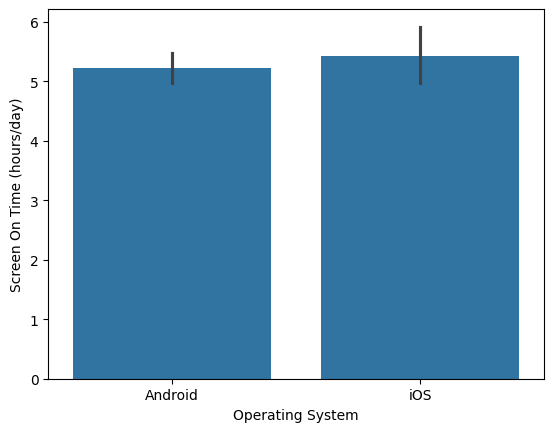

In [29]:
sns.barplot(x='Operating System', y='Screen On Time (hours/day)', data=df)

In [30]:
df.isnull().sum()

,0
User ID,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0
User Behavior Class,0


In [31]:
df.drop('User ID', axis=1, inplace=True)

In [32]:
df.head()

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Android,393,6.4,1872,67,1122,40,Male,4
1,Android,268,4.7,1331,42,944,47,Female,3
2,Android,154,4.0,761,32,322,42,Male,2
3,Android,239,4.8,1676,56,871,20,Male,3
4,iOS,187,4.3,1367,58,988,31,Female,3


In [33]:
df['Operating System'] = df['Operating System'].map({'Android': 0, 'iOS': 1})

In [34]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [35]:
df.head()

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,393,6.4,1872,67,1122,40,0,4
1,0,268,4.7,1331,42,944,47,1,3
2,0,154,4.0,761,32,322,42,0,2
3,0,239,4.8,1676,56,871,20,0,3
4,1,187,4.3,1367,58,988,31,1,3


In [36]:
scaler = StandardScaler()

In [37]:
X = df.drop('User Behavior Class', axis=1)
y = df['User Behavior Class']

In [38]:
X.head()

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,0,393,6.4,1872,67,1122,40,0
1,0,268,4.7,1331,42,944,47,1
2,0,154,4.0,761,32,322,42,0
3,0,239,4.8,1676,56,871,20,0
4,1,187,4.3,1367,58,988,31,1


In [39]:
required_columns = [
    "App Usage Time (min/day)",
    "Screen On Time (hours/day)",
    "Battery Drain (mAh/day)",
    "Number of Apps Installed",
    "Data Usage (MB/day)",
    "Age"
]

In [40]:
X[required_columns] = scaler.fit_transform(X[required_columns])

In [41]:
X.head()

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,0,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,0
1,0,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,1
2,0,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,0
3,0,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,0
4,1,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,1


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
model.score(X_train, y_train)

1.0

In [46]:
model.score(X_test, y_test)

1.0

Accuracy: 100.00%


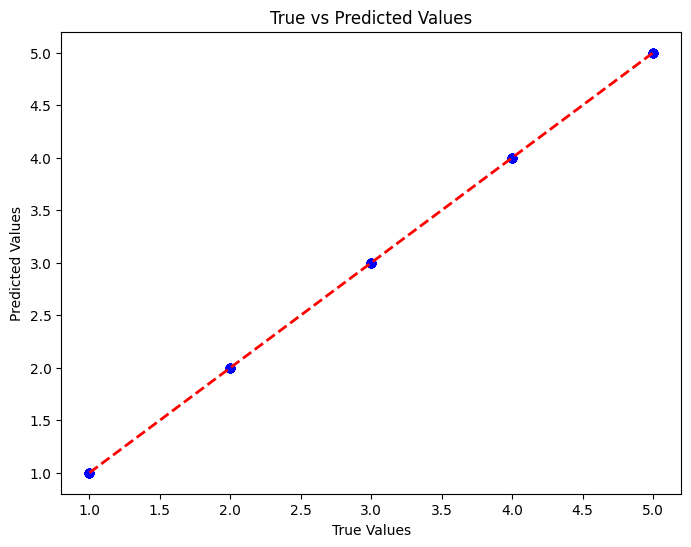

In [54]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Scatter plot (True vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Add a line for perfect predictions (y_pred = y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

# Labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()